In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib tk
import pickle

## 2D visualization - Invex

In [2]:
with open("./invex_out/2d_invx_plot_data.pkl", 'rb') as f:
    data = pickle.load(f)

In [4]:
data.keys()

dict_keys(['x1', 'x2', 'y', 'center'])

In [5]:
x1, x2, y, center = data["x1"], data["x2"], data["y"]+1, data["center"]
center = (center[0], center[1], center[2]+1)

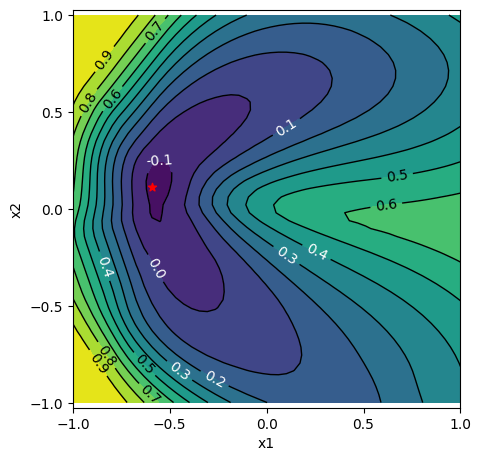

In [6]:
%matplotlib inline

# plt.figure(figsize=(6,6.2))
plt.figure(figsize=(6/6*5,6.2/6*5))
plt.axis('equal')

lvls = 12
plt.contourf(x1, x2, y, levels=lvls)#, cmap=matplotlib.cm.bwr)

clrs = ['white','white','white','white','white','white','white','k','k','k','k','k']
cs = plt.contour(x1, x2, y, levels=lvls, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.1f", colors=clrs)

plt.scatter(center[0], center[1], color='red', marker='*')

# plt.title("(d)")

plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.xlabel("x1")
plt.ylabel("x2")
plt.xlim(-1,1)
plt.ylim(-1,1)
# plt.show()
plt.savefig("./invex_out/out_invex_contour.pdf")

In [7]:
# boundary0 = 
ba0, ba1 = np.nonzero(x1==-1)
bb0, bb1 = np.nonzero(x2==1)
bc0, bc1 = np.nonzero(x1==1)
bc0, bc1 = bc0[::-1], bc1[::-1]
bd0, bd1 = np.nonzero(x2==-1)
bd0, bd1 = bd0[::-1], bd1[::-1]

b0, b1 = np.concatenate((ba0,bb0,bc0,bd0)), np.concatenate((ba1,bb1,bc1,bd1))

bx1 = x1[b0,b1]
bx2 = x2[b0,b1]
by = y[b0,b1]

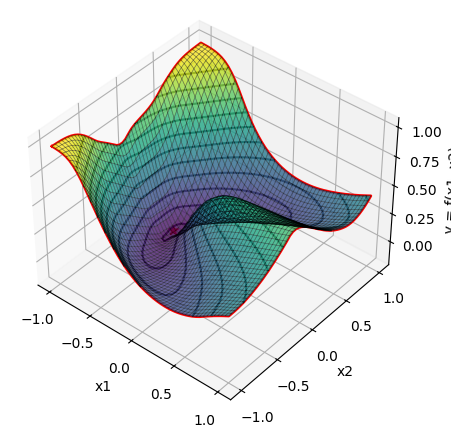

In [9]:
%matplotlib inline

fig = plt.figure(figsize=(7,6.2/6*5))
# fig = plt.figure(figsize=(8,6))
# fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
# ax.view_init(43, -49)
# ax.view_init(49, -71)
# ax.view_init(27, -65)
ax.view_init(40, -50)

ax.plot_surface(x1, x2, y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(x1, x2, y, alpha=0.5, lw=0.5, color='k')

ax.contour3D(x1, x2, y, alpha=0.9, levels=lvls, linestyles="None", colors="k")
ax.scatter(*center, marker="*", lw=1, color='r', s=50)
# ax.plot([center[0]],[center[1]],[center[2]], 'r*', alpha=0.5)
ax.plot(bx1, bx2, by, color="red", alpha=1, lw=2)#'dimgray'

# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
# plt.title("(c)")

plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='z', nbins=5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y = f(x1, x2)')
# plt.pause(10)
# plt.show()
plt.savefig("./invex_out/out_invex_2d_func.pdf")

## Quasi-Convex Visualization

In [12]:
with open("./invex_out/2d_quasiConvex_plot_data.pkl", 'rb') as f:
    data = pickle.load(f)
    x1, x2, y, center = data["x1"], data["x2"], data["y"], data["center"]

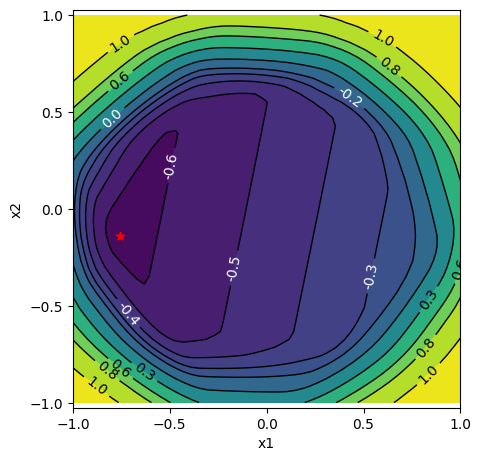

In [13]:
%matplotlib inline

plt.figure(figsize=(6/6*5,6.2/6*5))
plt.axis('equal')

# lvls = 12
lvls = np.sort([1.1, 1, 0.8, 0.6, 0.3, 0, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7])
clrs = ['white','white','white','white','white','white','white','k','k','k','k','k']
plt.contourf(x1, x2, y, levels=lvls)#, cmap=matplotlib.cm.bwr)
cs = plt.contour(x1, x2, y, levels=lvls, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.1f", rightside_up=True, colors=clrs)

plt.scatter(center[0], center[1], color='red', marker='*')

plt.xlabel("x1")
plt.ylabel("x2")
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.xlim(-1,1)
plt.ylim(-1,1)
# plt.title("(b)")
# plt.show()
plt.savefig("./invex_out/out_qc_contour.pdf")

In [14]:
# boundary 
ba0, ba1 = np.nonzero(x1==-1)
bb0, bb1 = np.nonzero(x2==1)
bc0, bc1 = np.nonzero(x1==1)
bc0, bc1 = bc0[::-1], bc1[::-1]
bd0, bd1 = np.nonzero(x2==-1)
bd0, bd1 = bd0[::-1], bd1[::-1]

b0, b1 = np.concatenate((ba0,bb0,bc0,bd0)), np.concatenate((ba1,bb1,bc1,bd1))

bx1 = x1[b0,b1]
bx2 = x2[b0,b1]
by = y[b0,b1]

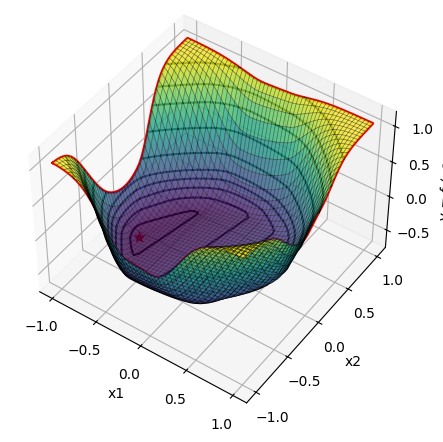

In [15]:
%matplotlib inline

fig = plt.figure(figsize=(7,6.2/6*5))
# fig = plt.figure(figsize=(8,6))
# fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
# ax.view_init(43, -49)
# ax.view_init(49, -71)
# ax.view_init(27, -65)
ax.view_init(45, -55)

ax.plot_surface(x1, x2, y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(x1, x2, y, alpha=0.5, lw=0.5, color='k')

ax.contour3D(x1, x2, y, alpha=1, levels=lvls,linestyles="None", colors="k")
ax.scatter(*center, marker="*", lw=1, color='r', s=50)
# ax.plot([center[0]],[center[1]],[center[2]], 'r*', alpha=0.5)
# ax.plot(bx1, bx2, by, color="k", alpha=1, lw=3)#'dimgray'
ax.plot(bx1, bx2, by, color="red", alpha=1, lw=2)


# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='z', nbins=5)

# plt.title("(a)")

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y = f (x1, x2)')
# plt.pause(10)
# plt.show()
plt.savefig("./invex_out/out_qc_2d_func.pdf")

## Normal Function Plot

In [17]:
with open("./invex_out/2d_ordinary_plot_data.pkl", 'rb') as f:
    data = pickle.load(f)
    
    x1, x2, y = data["x1"], data["x2"], data["y"]

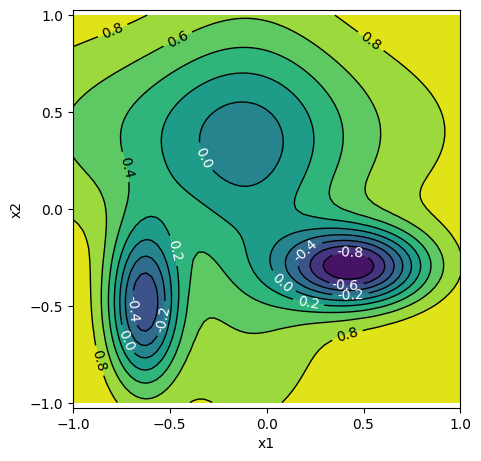

In [18]:
%matplotlib inline

plt.figure(figsize=(6/6*5,6.2/6*5))
plt.axis('equal')

lvls = 12
# lvls = np.sort([1.1, 1, 0.8, 0.6, 0.3, 0, -0.2, -0.3, -0.4, -0.5, -0.6, -0.7])
clrs = ['white','white','white','white','white','white','white','k','k','k','k','k']
plt.contourf(x1, x2, y, levels=lvls)#, cmap=matplotlib.cm.bwr)
cs = plt.contour(x1, x2, y, levels=lvls, linestyles="None", colors="k", linewidths=1)
plt.clabel(cs, cs.levels, inline=True, fontsize=10, fmt="%1.1f", rightside_up=True, colors=clrs)

# plt.scatter(center0[0], center0[1], color='red', marker='*')

plt.xlabel("x1")
plt.ylabel("x2")
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.xlim(-1,1)
plt.ylim(-1,1)
# plt.title("(b)")
# plt.show()
plt.savefig("./invex_out/out_ordinary_contour.pdf")

In [19]:
# boundary 
ba0, ba1 = np.nonzero(x1==-1)
bb0, bb1 = np.nonzero(x2==1)
bc0, bc1 = np.nonzero(x1==1)
bc0, bc1 = bc0[::-1], bc1[::-1]
bd0, bd1 = np.nonzero(x2==-1)
bd0, bd1 = bd0[::-1], bd1[::-1]

b0, b1 = np.concatenate((ba0,bb0,bc0,bd0)), np.concatenate((ba1,bb1,bc1,bd1))

bx1 = x1[b0,b1]
bx2 = x2[b0,b1]
by = y[b0,b1]

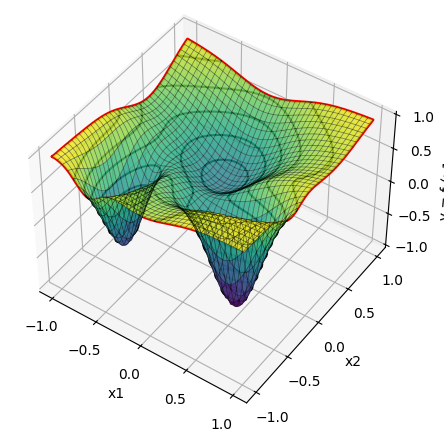

In [21]:
%matplotlib inline

fig = plt.figure(figsize=(7,6.2/6*5))
# fig = plt.figure(figsize=(8,6))
# fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(projection='3d')
# ax.view_init(43, -49)
# ax.view_init(49, -71)
# ax.view_init(27, -65)
ax.view_init(45, -55)

ax.plot_surface(x1, x2, y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(x1, x2, y, alpha=0.5, lw=0.5, color='k')

ax.contour3D(x1, x2, y, alpha=1, levels=lvls,linestyles="None", colors="k")
# ax.plot(bx1, bx2, by, color="k", alpha=1, lw=3)#'dimgray'
ax.plot(bx1, bx2, by, color="red", alpha=1, lw=2)


# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='z', nbins=5)

# plt.title("(a)")

ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y = f (x1, x2)')
# plt.pause(10)
# plt.show()
plt.savefig("./invex_out/out_ordinary_2d_func.pdf")